In [23]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
X = pd.read_csv('zoo_data.csv',index_col=False)
print(X)

     hair  feathers  eggs  milk  air  aquatic  predator  toothed  bckbon  \
0       1         0     0     1    0        0         1        1       1   
1       1         0     0     1    0        0         0        1       1   
2       0         0     1     0    0        1         1        1       1   
3       1         0     0     1    0        0         1        1       1   
4       1         0     0     1    0        0         1        1       1   
..    ...       ...   ...   ...  ...      ...       ...      ...     ...   
96      1         0     0     1    0        0         0        1       1   
97      1         0     1     0    1        0         0        0       0   
98      1         0     0     1    0        0         1        1       1   
99      0         0     1     0    0        0         0        0       0   
100     0         1     1     0    1        0         0        0       1   

     breaths  venomous  fins  legs  tail  domestic  catsize  type  
0          1       

In [3]:
target=X['type']
target.head(10)

0    1
1    1
2    4
3    1
4    1
5    1
6    1
7    4
8    4
9    1
Name: type, dtype: int64

In [4]:
df2 = X.copy()
df2

,hair,feathers,eggs,milk,air,aquatic,predator,toothed,bckbon,breaths,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df2=df2.iloc[:,:-1]
df2

,hair,feathers,eggs,milk,air,aquatic,predator,toothed,bckbon,breaths,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split( 
df2, target, test_size = 0.3, random_state = 100)

In [7]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [8]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

In [9]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [10]:
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
y_pred

Predicted values:


array([2, 4, 7, 1, 1, 7, 1, 2, 2, 2, 1, 7, 1, 7, 7, 1, 4, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 7, 2, 1])

In [12]:
y1_pred = clf_entropy.predict(X_test)
print("Predicted values:")
(y1_pred)

Predicted values:


array([2, 4, 2, 1, 1, 2, 1, 2, 2, 2, 1, 6, 1, 2, 6, 1, 4, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 6, 2, 1])

In [13]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[12  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0]]


In [14]:
print("Confusion Matrix: ",confusion_matrix(y_test, y1_pred))

Confusion Matrix:  [[12  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  3]]


In [15]:
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)

Accuracy :  80.64516129032258


In [16]:
print ("Accuracy : ",accuracy_score(y_test,y1_pred)*100)

Accuracy :  90.32258064516128


In [17]:
print("Report : ",classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        11
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0

    accuracy                           0.81        31
   macro avg       0.43      0.43      0.43        31
weighted avg       0.81      0.81      0.81        31



/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("Report : ",classification_report(y_test, y1_pred))

Report :                precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.79      1.00      0.88        11
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         3

    accuracy                           0.90        31
   macro avg       0.63      0.67      0.65        31
weighted avg       0.83      0.90      0.86        31



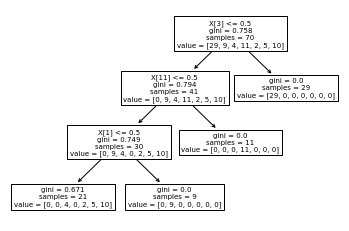

In [24]:
tree.plot_tree(clf_gini);

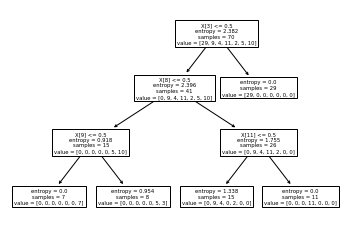

In [25]:
tree.plot_tree(clf_entropy);